<a href="https://colab.research.google.com/github/athulvingt/AlphaPose/blob/master/Alphapose_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alphapose Inference on Colab

In [ ]:
!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html
import os
from os.path import exists, join, basename, splitext

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 36.9MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
git_repo_url = 'https://github.com/athulvingt/AlphaPose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q {git_repo_url}
  !pip install -q youtube-dl cython gdown
  !pip install -q -U PyYAML
  !apt-get install -y -q libyaml-dev
  !cd {project_name} && python setup.py build develop --user

     |████████████████████████████████| 1.8MB 7.2MB/s 
     |████████████████████████████████| 276kB 6.9MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 55.7 kB of archives.
After this operation, 246 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libyaml-dev amd64 0.1.7-2ubuntu3 [55.7 kB]
Fetched 55.7 kB in 0s (1,288 kB/s)
Selecting previously unselected package libyaml-dev:amd64.
(Reading database ... 144556 files and directories currently installed.)
Preparing to unpack .../libyaml-dev_0.1.7-2ubuntu3_amd64.deb ...
Unpacking libyaml-dev:amd64 (0.1.7-2ubuntu3) ...
Setting up libyaml-dev:amd64 (0.1

In [ ]:
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import YouTubeVideo

In [ ]:
yolo_pretrained_model_path = join(project_name, 'detector/yolo/data/yolov3-tiny.weights')
yoloconfig_path = join(project_name,'detector/yolo/cfg/yolov3-tiny.cfg')
!gdown -O {yoloconfig_path} https://drive.google.com/uc?id=1n1X3nebnjQ1J7Ni1jLgT9Hm54Uim3fyF
if not exists(yolo_pretrained_model_path):
  # download the YOLO weights
  !mkdir -p {project_name}/detector/yolo/data
  !gdown -O {yolo_pretrained_model_path} https://drive.google.com/uc?id=1rsKfEMLyWHZa4N4_eUB3AxTLKxMXYGc9

# ResNet18 backbone (trained over Mscoco validation set - 61 Iterations)
pretrained_model_path = join(project_name, 'pretrained_models/model_61.pth')
pretrained_model_config_path = join(project_name, 'configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml')
if not exists(pretrained_model_path):
  # download the pretrained model
  !gdown -O {pretrained_model_path} https://drive.google.com/uc?id=10zHjg7riF-hV-695WIleuCIbQFx2npw1

Downloading...
From: https://drive.google.com/uc?id=1n1X3nebnjQ1J7Ni1jLgT9Hm54Uim3fyF
To: /content/AlphaPose/detector/yolo/cfg/yolov3-tiny.cfg
100% 2.10k/2.10k [00:00<00:00, 979kB/s]
Downloading...
From: https://drive.google.com/uc?id=1rsKfEMLyWHZa4N4_eUB3AxTLKxMXYGc9
To: /content/AlphaPose/detector/yolo/data/yolov3-tiny.weights
35.4MB [00:00, 53.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=10zHjg7riF-hV-695WIleuCIbQFx2npw1
To: /content/AlphaPose/pretrained_models/model_61.pth
57.1MB [00:00, 92.8MB/s]


In [ ]:
## uncomment to try it on yolov3-spp



# yolo_pretrained_model_path = join(project_name, 'detector/yolo/data/yolov3-spp.weights')
# if not exists(yolo_pretrained_model_path):
#   # download the YOLO weights
#   !mkdir -p {project_name}/detector/yolo/data
#   !gdown -O {yolo_pretrained_model_path} https://drive.google.com/uc?id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC

Downloading...
From: https://drive.google.com/uc?id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC
To: /content/AlphaPose/detector/yolo/data/yolov3-spp.weights
252MB [00:02, 103MB/s]


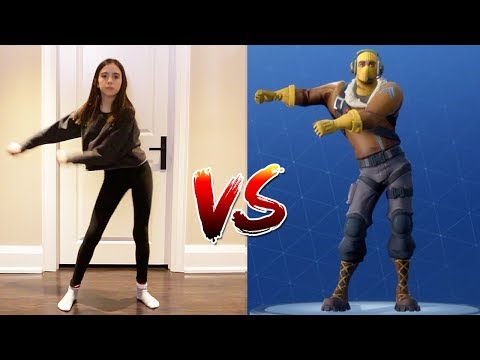

In [ ]:
YOUTUBE_ID = 'RXABo9hm8B8'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -df youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v={YOUTUBE_ID}
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 180 video.avi
# run AlpaPose on these 5 seconds video
!rm -rf AlphaPose_video.avi

[youtube] RXABo9hm8B8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 116.25MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis

In [ ]:
# --det_batch number images in one batch (before yolo detection)
# --qsize queue size for pose estimation (count of detetcted people) 

!cd {project_name} && python3 scripts/demo_inference.py --video ../video.avi --outdir ../ --sp --save_video --checkpoint ../{pretrained_model_path} --cfg ../{pretrained_model_config_path} --detbatch 1 --qsize 10


1
Loading YOLO model..
Loading pose model from ../AlphaPose/pretrained_models/model_61.pth...
100% 4316/4316 [22:37<00:00,  3.18it/s]
===========================> Finish Model Running.
===========================> Rendering remaining images in the queue...
===========================> If this step takes too long, you can enable the --vis_fast flag to use fast rendering (real-time).
===========================> Rendering remaining 6 images in the queue...
===========================> Rendering remaining 2 images in the queue...
===========================> Rendering remaining 0 images in the queue...
Results have been written to json.


##Converting AVI video in MP4 format

In [ ]:
# convert the result into MP4
!ffmpeg -y -loglevel info -i AlphaPose_video.avi -vcodec libx264 output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

If everthing worked fine the output file would be large and it cannot be viewed in jupyter notebook, In that case download the video from file manager

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=480, height=360)